# Predicting-Bike-Sharing-Demand-Using-Regression Techniques

# Bike Sharing Systems 

In [64]:
 #Bike sharing systems are a means of renting bicycles where the process of obtaining membership, 
 #rental, and bike return is auto

# Objective

In [65]:
# The main objective of this project is to explore and create a differnt Regression Techniques .
# we try to which model is better predict bike sharing demand
# We use Data Analysis & Regression Techniques conducted on Bike Sharing Demand data set. 
# Total vehical count for the particular day

# Attribute 

In [66]:
# we have hourly wise data & day wise data
# Both hour.csv and day.csv have Attribute.hourly data having the hr attribute.

-we have hourly wise data & day wise data
-Both hour.csv and day.csv have Attribute.hourly data having the hr attribute.

- 1) Instant - id/record index
- 2) dteday  - date
- 3) season  - season (1:winter, 2:spring, 3:summer, 4:fall)
- 4) yr      - year (0: 2011, 1:2012)
- 5) mnth    - month ( 1 to 12)
- 6) hr      - hour (0 to 23)
- 7) holiday - weather day is holiday or not 
- 8) weekday - day of the week
- 9) workingday-if day is neither weekend nor holiday is 1, otherwise is 0.
- 10) weathersit -
      1: Clear, Few clouds, Partly cloudy, Partly cloudy
      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- 11)temp - Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 
      (only in hourly scale)
- 12)atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), 
       t_min=-16,t_max=+50 (only in hourly scale)
- 13)hum - Normalized humidity. The values are divided to 100 (max)
- 14)windspeed- Normalized wind speed. The values are divided to 67 (max)
- 15)casual: count of casual users

# Import modules

In [67]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Import dataset

In [68]:
os.chdir("C:\\Users\\HP\\Desktop\\My Project")

In [69]:
df = pd.read_csv("hour.csv")

In [70]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [72]:
# The dataset has 17379 rows and 17 columns
# Here, Output Variable(Y) - count
# Eplanatory Variables(X)  - instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,
#                          - temp,atemp,hum,windspeed,casual,registered

In [73]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [74]:
# Here,We check Output Variable On Statistics
# 17379 Total count rent a bike on the day
# Average of the  rent of bike count is 189.463088 ~ 190
# minimum rent of bike count of the day is 1 and maximum rent of bike count of the day is 977
# 25% rent of bike count is less than 40
# 25% rent of bike count is more than 40 means 142
# 50% rent of bike count less than 142
# 75% rent of bike count less than 281

In [75]:
 # To check unique Values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Preprocessing the dataset

In [76]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [77]:
# Rename of the column

In [78]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [79]:
# drop the unnesseary columns

In [80]:
df = df.drop(columns=['instant', 'dteday', 'year'])

In [81]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [82]:
# change int columns to category
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
season        17379 non-null category
month         17379 non-null category
hour          17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weather       17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

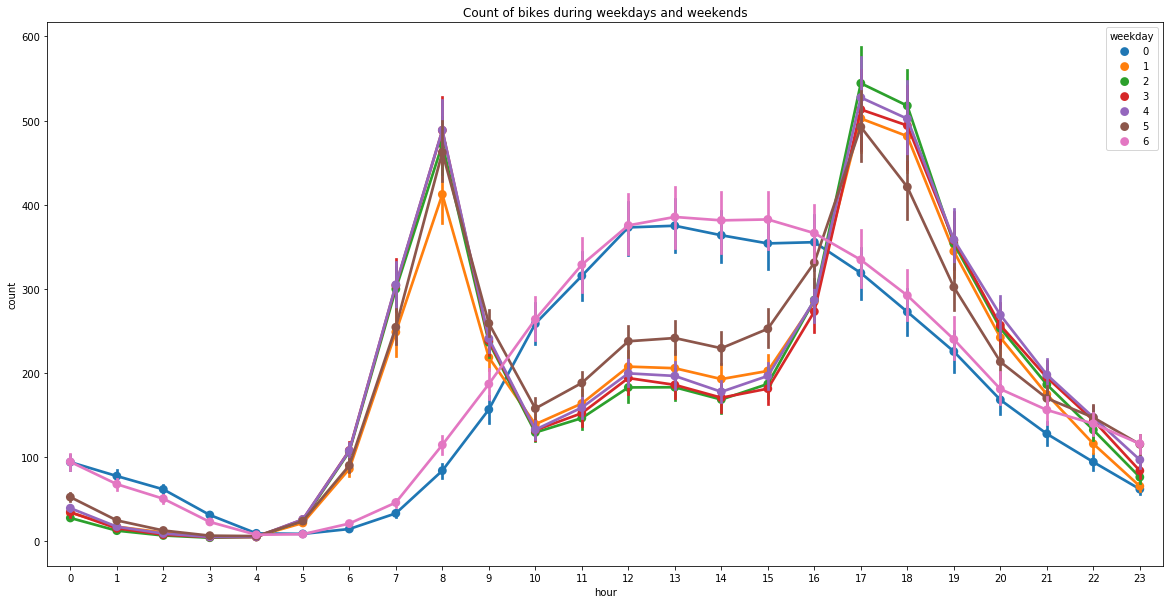

In [83]:
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

In [84]:
# Here inference this graph,Bike sharing peak start from morning 6 to 10 am .beacause many people go to office.
# 10 am to 3 pm afternoon time decrease peak .again increasing graph evening.4 pm to 10 pm again the increase graph .
# again decrease the graph till 10 pm

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends:Unregistered users')]

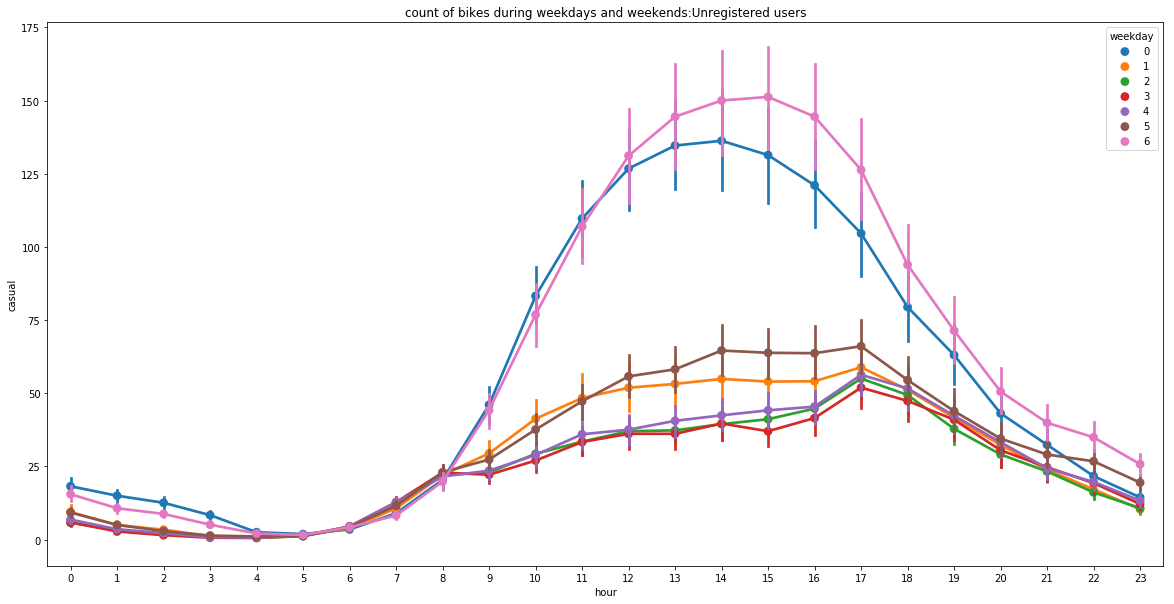

In [85]:
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='casual',hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends:Unregistered users')

In [86]:
# Here inference this graph for unregistered users means not much use app.
# I think weekends many teanager drive a bike 

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends:Registered users')]

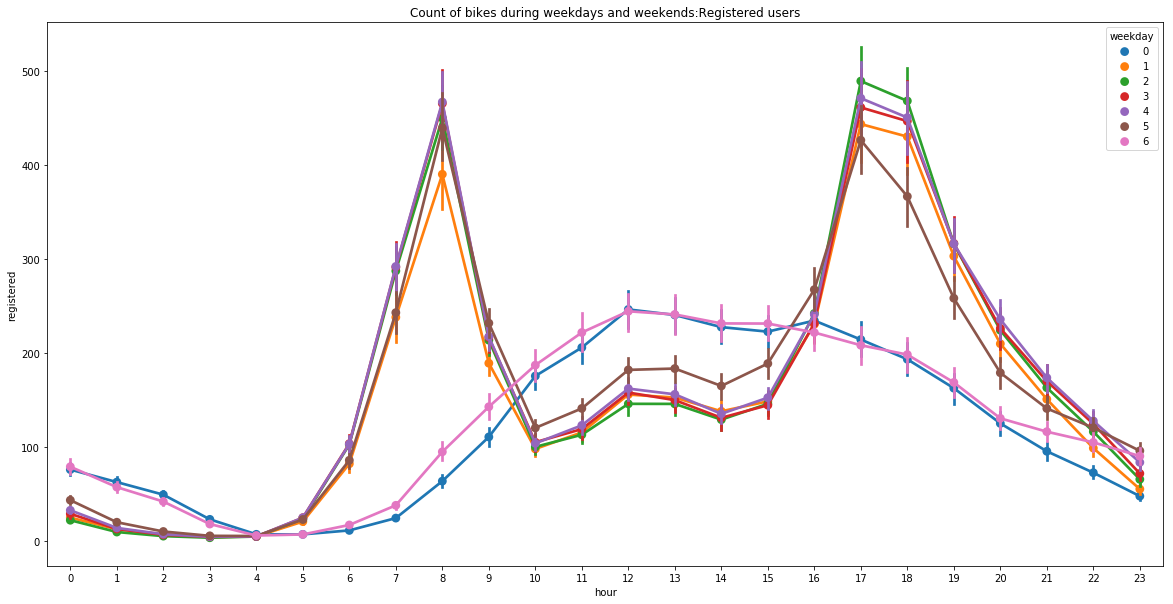

In [87]:
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='registered',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends:Registered users')

In [88]:
# Here inference this graph for registered users means use app.
# weekdays increase the peak of graph and decrease the peak of graph . 

[Text(0.5, 1.0, 'count of bikes during different weathers')]

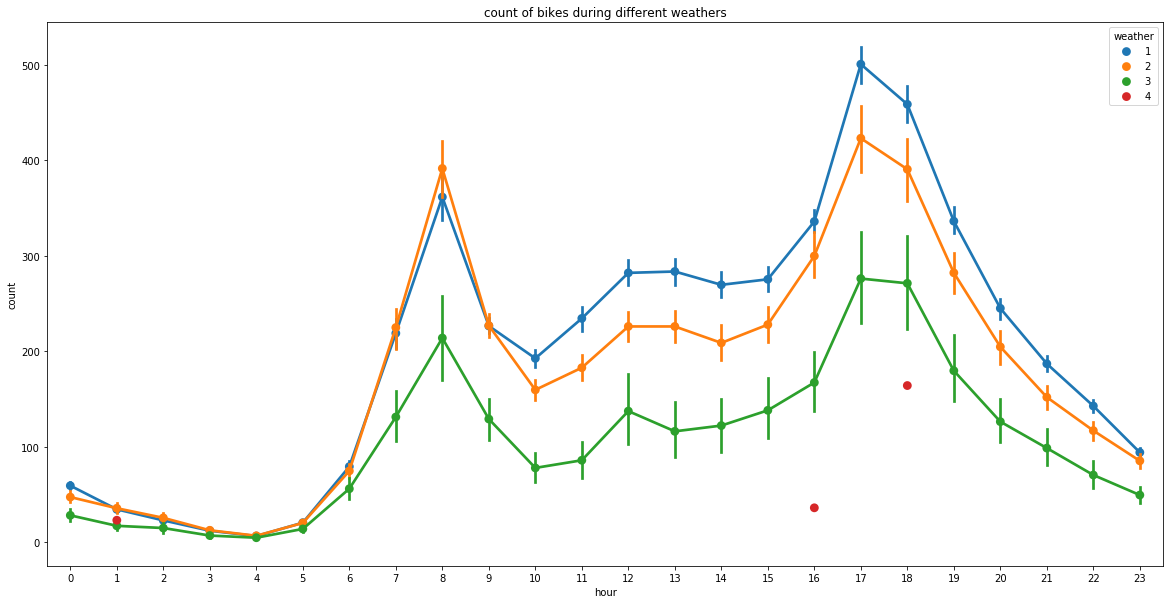

In [89]:
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='weather',ax=ax)
ax.set(title='count of bikes during different weathers')

In [90]:
# we have 4 types of wheathers.similarly high numbers of users 6 am and 8 pm.
# 1 type of wheather not much use bike. i think wheather is heavy rain

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

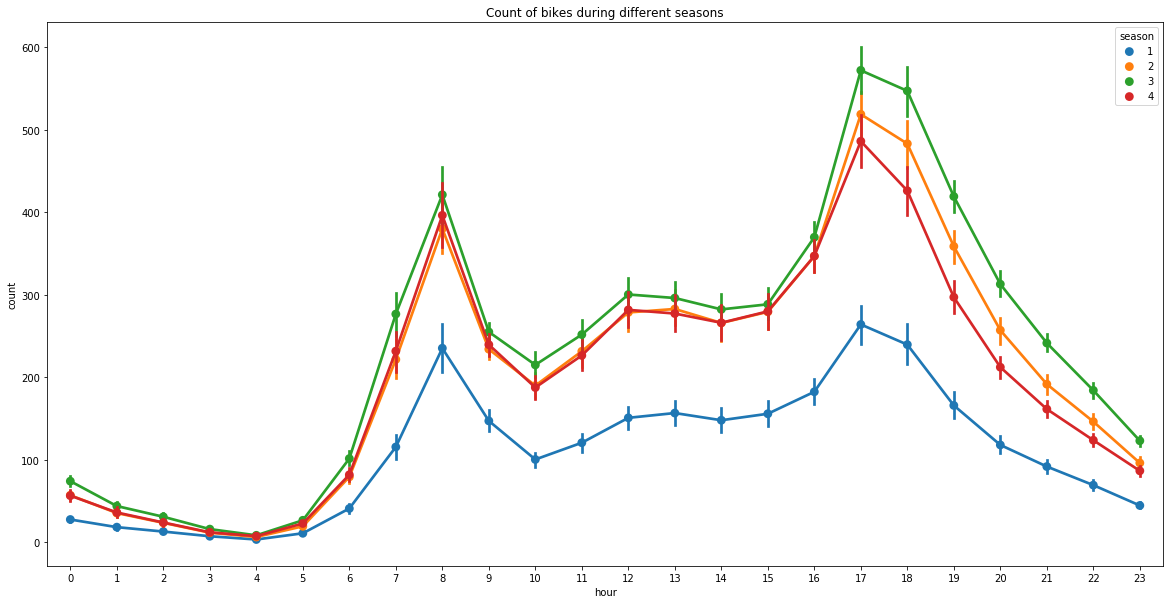

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

In [92]:
# we have 4 types of seasons.similarly high numbers of users 6 am and 8 pm.
# 1 type of season not much use bike. i think season is heavy rain

[Text(0.5, 1.0, 'Count of bikes during different months')]

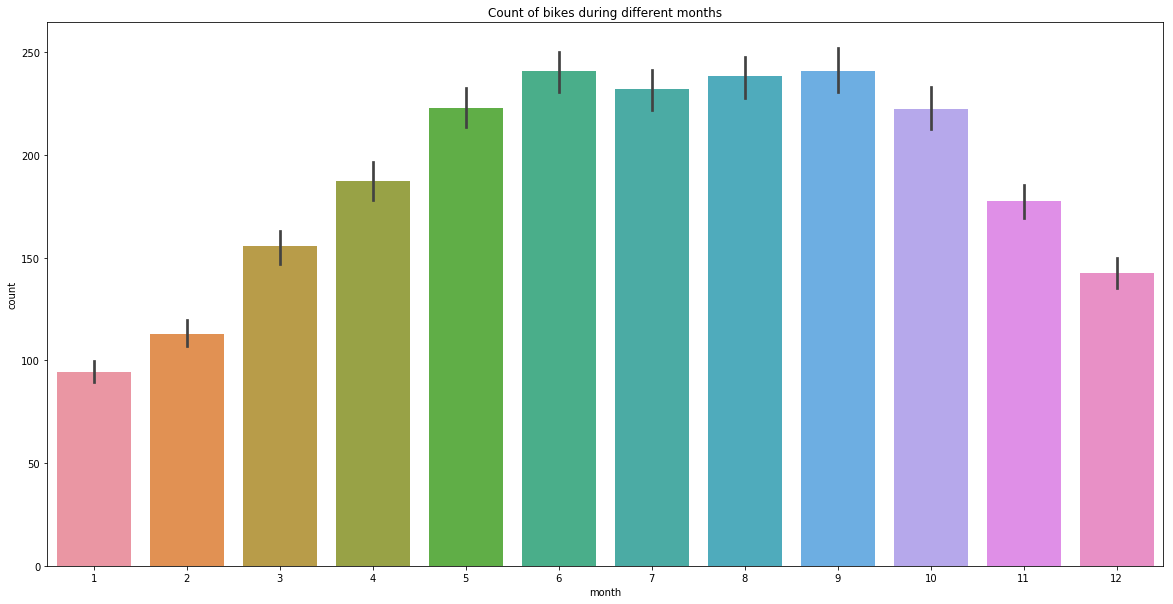

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

In [94]:
# start the year not much use bike after slowly increase the frequency bar graph.
# again decrease the bbar graph end of the year 
# Here like uniform distribution

[Text(0.5, 1.0, 'Count of bikes during different days')]

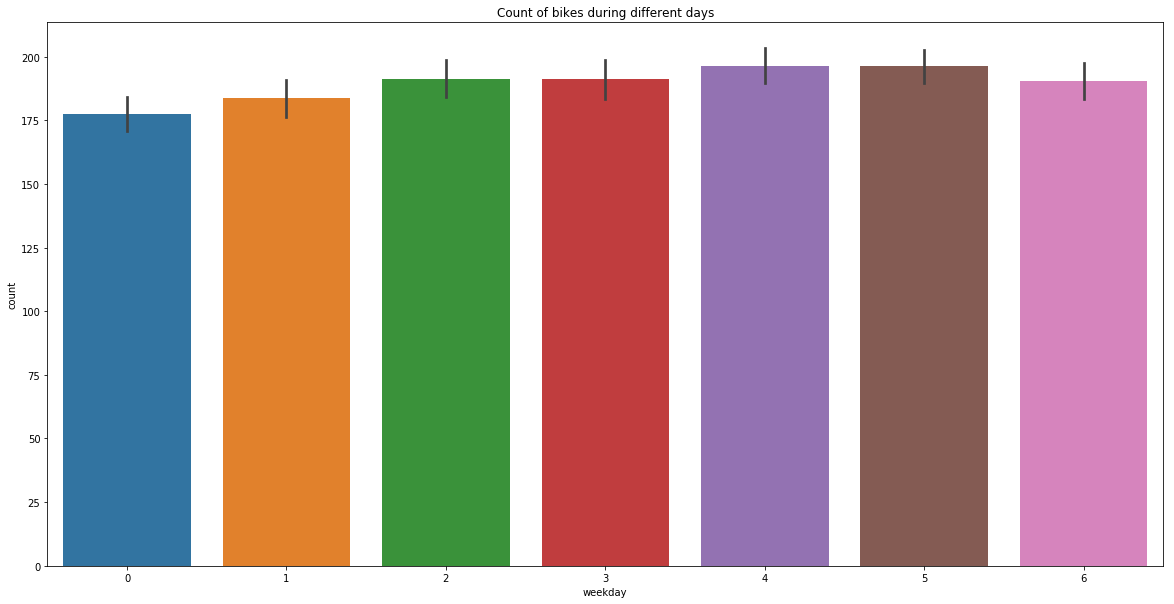

In [95]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

In [96]:
# Here not much inference getting because here all the day equal number of vehicals rent .
# so this is average number of distribution

In [97]:
# We create Regression Plots

[Text(0.5, 1.0, 'Relation between humidity and users')]

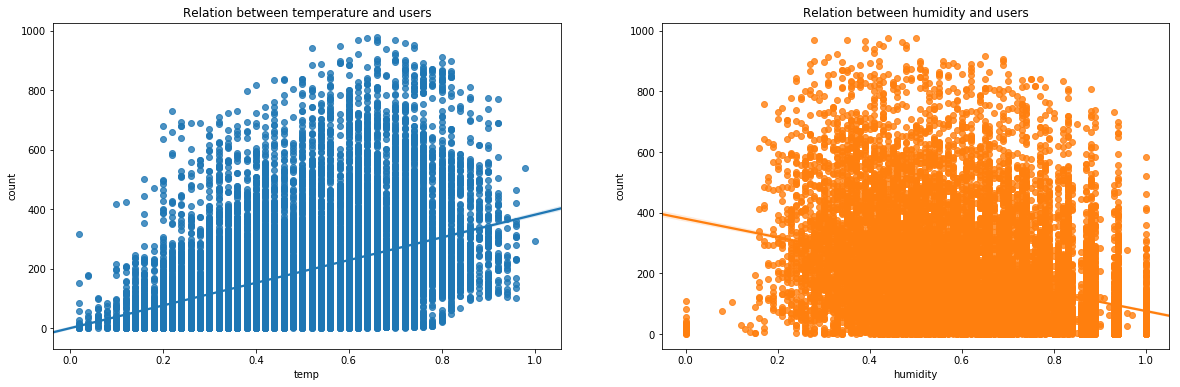

In [98]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

In [99]:
# Here temp increases then increases of users vehicle 
# Here humidity increases then decreases of users vehicle 

[Text(0.5, 1.0, 'Theoritical quantiles')]

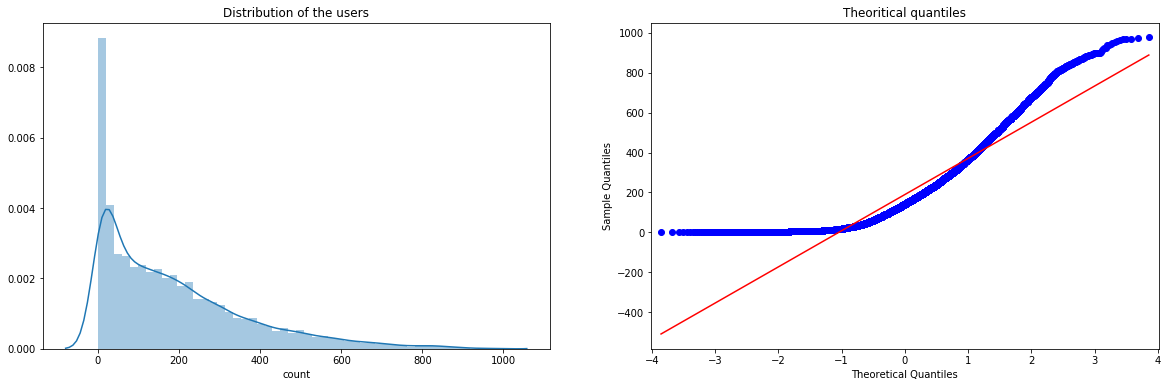

In [100]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [101]:
# count plot of data is left skewed.so mean is less than the median
# count plot of is diagonal line means plot deviates from the reference line 
# normal probability of plot is heavy tailed distribution

In [102]:
# so we normalize the target variable

In [103]:
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

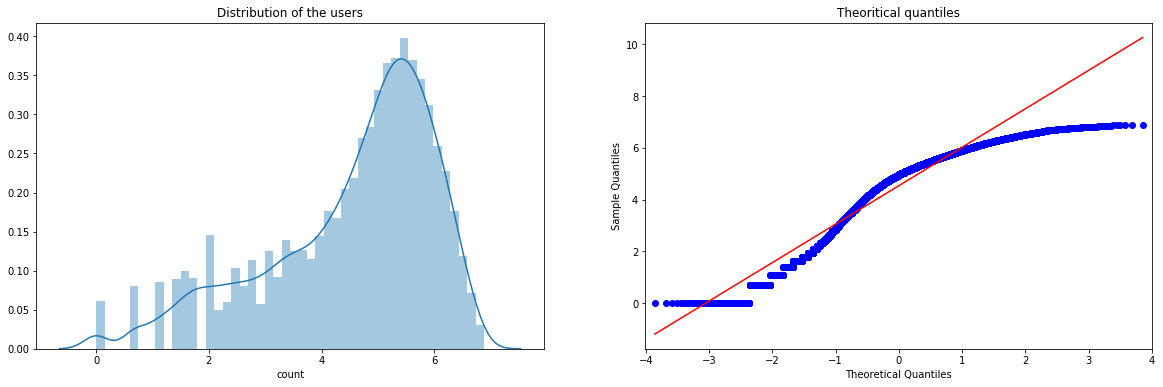

In [104]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [105]:
# count plot of data is uniformaly distributed plot
# normal probability of plot is heavy tailed distribution

In [106]:
# To check correlation

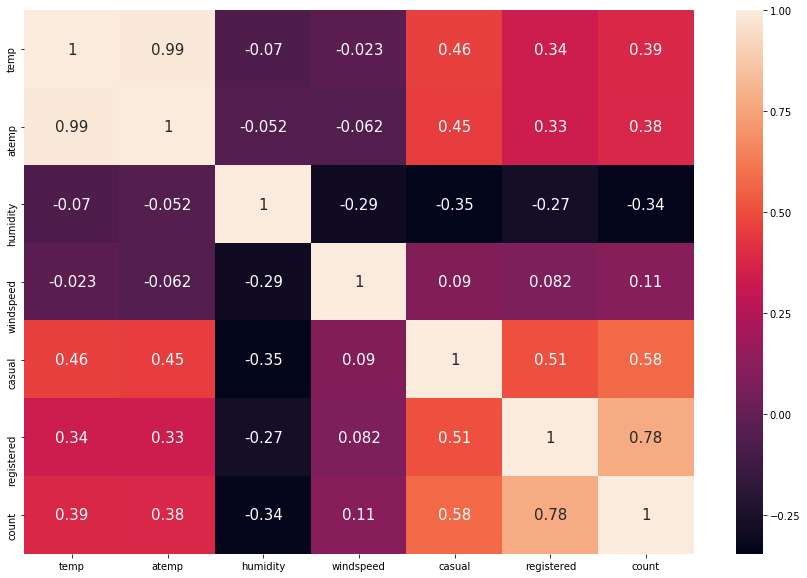

In [107]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [108]:
# count variable is highly correlated
# you can see the registered and casuals are highly correlated with count .
# 0.39 temp and 0.99 atemp variable actually same pattern .so one variable is delete 
# humadity & winspeed variable are influence
# so further analysis we drop the column atemp, windspeed, casual, registered

# One hot encoding

In [109]:
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [110]:
# One hot encoding for all categorical variable

In [111]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Input Split

In [112]:
x = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [114]:
# Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred_lin_reg = lin_reg.predict(x_test)

print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))
print("R2 score:", r2_score(y_test, y_pred_lin_reg))

Linear Regression: 
RMSE: 0.6779585861612354
R2 score: 0.7894669912454821


In [116]:
# Fitted linear regression matrix has R square value is 0.78 
# which means that the regression line explain 78%  total rent of count 
# so R square value is  close to 1 the independent variable explain a relatively
# large praportion of variability in the data .

In [117]:
#The matrix of the fitted linear regression model was R square value is 0.78 means 78%  which is good enough, but 
#we want to improve the accuracy, so we go to Decisiontree Regressor ,Randomforest Regressor.

In [118]:
# Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

dec_tree.fit(x_train, y_train)

y_pred_dec = dec_tree.predict(x_test)

print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_dec)))
print("R2 score:", r2_score(y_test, y_pred_dec))


Decision tree regression: 
RMSE: 0.6840628313106326
R2 score: 0.7856587033706725


In [120]:
# Random Forest Regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

ran_for.fit(x_train, y_train)

y_pred_ran_for = ran_for.predict(x_test)

print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_ran_for)))
print("R2 score:", r2_score(y_test, y_pred_ran_for))


Random forest regression: 
RMSE: 0.494149452191519
R2 score: 0.8881514127558012


In [122]:
# Fitted Random Forest Regressor matrix has R square value is 0.88
# which means that the regression line explain 88%  total rent of count 
# so R square value is  close to 1 the independent variable explain a relatively
# large praportion of variability in the data .

In [123]:
# so linear regression is R squae value is 0.78
# Decision Tree Regressor is R squae value is 0.78
# Random Forest Regressor is R squae value is 0.88
# so best fitted model is Random Forest Regressor